step.1: 生成 600 個以 C1=(0,0) 為中心、變異數為 10 的隨機點

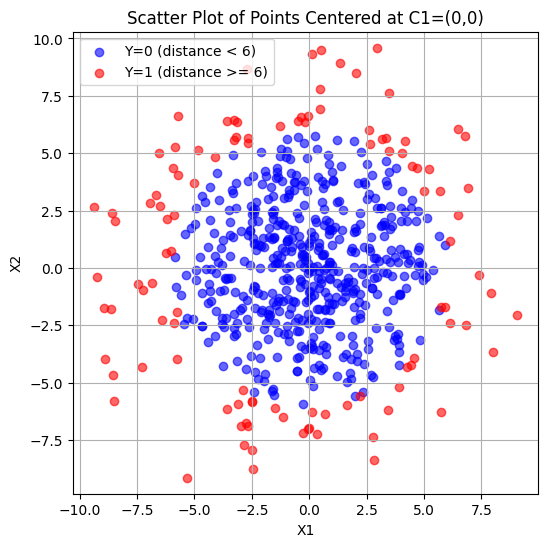

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

num_points = 600
C1 = [0, 0]
variance = 10
cov = [[variance, 0], [0, variance]]
points1 = np.random.multivariate_normal(C1, cov, num_points)
distances1 = np.sqrt(points1[:, 0]**2 + points1[:, 1]**2)
labels1 = np.where(distances1 < 6, 0, 1)

# 繪製步驟 1 的散點圖
plt.figure(figsize=(6, 6))
plt.scatter(points1[labels1 == 0, 0], points1[labels1 == 0, 1], color='blue', label='Y=0 (distance < 6)', alpha=0.6)
plt.scatter(points1[labels1 == 1, 0], points1[labels1 == 1, 1], color='red', label='Y=1 (distance >= 6)', alpha=0.6)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of Points Centered at C1=(0,0)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


step.2: 生成以 C2=(10,10) 為中心、變異數為 10 的另一組點

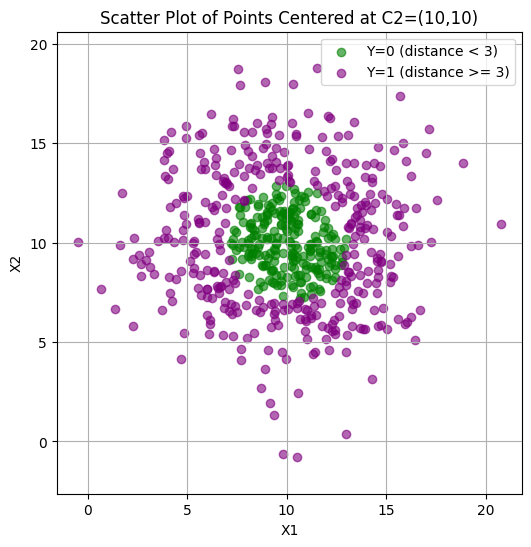

In [4]:
C2 = [10, 10]
points2 = np.random.multivariate_normal(C2, cov, num_points)
distances2 = np.sqrt((points2[:, 0] - C2[0])**2 + (points2[:, 1] - C2[1])**2)
labels2 = np.where(distances2 < 3, 0, 1)

# 繪製步驟 2 的散點圖
plt.figure(figsize=(6, 6))
plt.scatter(points2[labels2 == 0, 0], points2[labels2 == 0, 1], color='green', label='Y=0 (distance < 3)', alpha=0.6)
plt.scatter(points2[labels2 == 1, 0], points2[labels2 == 1, 1], color='purple', label='Y=1 (distance >= 3)', alpha=0.6)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of Points Centered at C2=(10,10)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


step.3: 結合兩組點，並生成 X3 = f(X1, X2)

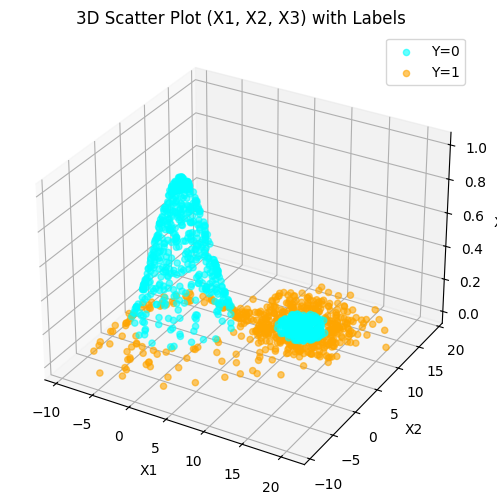

In [5]:
points = np.vstack((points1, points2))
labels = np.hstack((labels1, labels2))
x1, x2 = points[:, 0], points[:, 1]
x3 = np.exp(-0.05 * (x1**2 + x2**2))  # 使用高斯函數計算 X3

# 3D 散點圖
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1[labels == 0], x2[labels == 0], x3[labels == 0], color='cyan', label='Y=0', alpha=0.6)
ax.scatter(x1[labels == 1], x2[labels == 1], x3[labels == 1], color='orange', label='Y=1', alpha=0.6)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('3D Scatter Plot (X1, X2, X3) with Labels')
ax.legend()
plt.show()


step.4: 繪製一個近似分開 Y=0 和 Y=1 的超平面

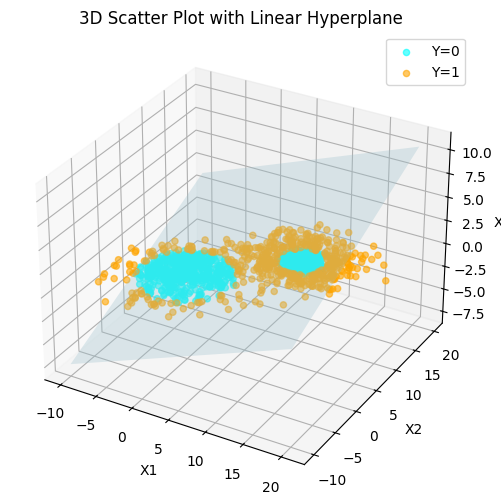

In [6]:

# 使用簡單的線性平面作為示例，例如 X3 = 0.3*X1 + 0.3*X2 - 1.5
x1_range = np.linspace(-10, 20, 10)
x2_range = np.linspace(-10, 20, 10)
X1, X2 = np.meshgrid(x1_range, x2_range)
X3 = 0.3 * X1 + 0.3 * X2 - 1.5

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1[labels == 0], x2[labels == 0], x3[labels == 0], color='cyan', label='Y=0', alpha=0.6)
ax.scatter(x1[labels == 1], x2[labels == 1], x3[labels == 1], color='orange', label='Y=1', alpha=0.6)
ax.plot_surface(X1, X2, X3, color='lightblue', alpha=0.3, rstride=100, cstride=100)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('3D Scatter Plot with Linear Hyperplane')
ax.legend()
plt.show()
